<a href="https://colab.research.google.com/github/Panjiprogram/repositori-pertamaku/blob/main/Real_ESRGAN_Image_and_Video_Upscaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# @title
# Clone Real-ESRGAN and enter the Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install ffmpeg-python
!pip install -r requirements.txt
!python setup.py develop

from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 720):

  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 759, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 759 (delta 106), reused 98 (delta 98), pack-reused 638 (from 1)
Receiving objects: 100% (759/759), 5.38 MiB | 21.35 MiB/s, done.
Resolving deltas: 100% (415/415), done.
/content/Real-ESRGAN
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-

In [3]:
import os

source = "image" # @param ["image", "video"]
input = "/content/drive/MyDrive/Real-ESRGAN/Taman Mesum.jpeg" # @param {type:"string"}
model = "RealESRGAN_x4plus" # @param ["RealESRGAN_x4plus", "RealESRGAN_x2plus", "RealESRNet_x4plus", "official ESRGAN_x4", "realesr-general-x4v3", "RealESRGAN_x4plus_anime_6B", "realesr-animevideov3"]
scale = 4 # @param {type:"slider", min:1, max:4, step:1}
face_enhance = True # @param {type:"boolean"}


if source=="image":
  code = "inference_realesrgan.py"
elif source =="video":
  code = "inference_realesrgan_video.py"

def generate_output_path(input_path):
    # Get the directory from the input path
    directory, _ = os.path.split(input_path)

    return directory

def generate_result_path(input_path):
    # Extract the directory and filename from the input path
    directory, filename = os.path.split(input_path)

    # Remove the extension from the filename
    filename_without_extension, extension = os.path.splitext(filename)

    # Create the output path by adding '_out' before the extension
    output_filename = filename_without_extension + "_out" + extension
    output_path = os.path.join(directory, output_filename)

    return output_path

output = generate_output_path(input)
result = generate_result_path(input)
print(output)
print(result)

/content/drive/MyDrive/Real-ESRGAN
/content/drive/MyDrive/Real-ESRGAN/Taman Mesum_out.jpeg


In [4]:
import os
import subprocess
import sys

# Define the path to the file. We need to find the actual location of basicsr.
# Use pip show to find the location of the basicsr package
try:
    # Use subprocess to run the pip show command
    result = subprocess.run([sys.executable, '-m', 'pip', 'show', 'basicsr'], capture_output=True, text=True, check=True)
    # Parse the output to find the Location line
    for line in result.stdout.splitlines():
        if line.startswith('Location:'):
            basicsr_location = line.split(':', 1)[1].strip()
            break
    else:
        raise FileNotFoundError("Could not find the location of basicsr package.")

    # Construct the file path relative to the basicsr package location
    file_path = os.path.join(basicsr_location, 'basicsr', 'data', 'degradations.py')
    print(f"Attempting to open: {file_path}")

    # Read the content of the file
    with open(file_path, 'r') as file:
        file_data = file.readlines()

    # Modify the specific line
    modified = False
    for i, line in enumerate(file_data):
        if 'from torchvision.transforms.functional_tensor import rgb_to_grayscale' in line:
            file_data[i] = 'from torchvision.transforms.functional import rgb_to_grayscale\n'
            modified = True
            break

    if not modified:
        print("Warning: The target line for modification was not found in the file.")

    # Write the modified content back to the file
    with open(file_path, 'w') as file:
        file.writelines(file_data)

    print("Modification applied successfully.")

except FileNotFoundError as e:
    print(f"Error: Could not find the basicsr package or the target file. Details: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

Attempting to open: /usr/local/lib/python3.11/dist-packages/basicsr/data/degradations.py
Modification applied successfully.


In [5]:
if face_enhance == True:
  command = f"python '{code}' -i '{input}' -n '{model}' -o '{output}' -s '{scale}' --face_enhance"
elif face_enhance == False:
  command = f"python '{code}' -i '{input}' -n '{model}' -o '{output}' -s '{scale}'"
!{command}
# -h                   show this help
# -i input-path        input image path (jpg/png/webp) or directory
# -o output-path       output image path (jpg/png/webp) or directory
# -s scale             upscale ratio (can be 2, 3, 4. default=4)
# -t tile-size         tile size (>=32/0=auto, default=0) can be 0,0,0 for multi-gpu
# -m model-path        folder path to the pre-trained models. default=models
# -n model-name        model name (default=realesr-animevideov3, can be realesr-animevideov3 | realesrgan-x4plus | realesrgan-x4plus-anime | realesrnet-x4plus)
# -g gpu-id            gpu device to use (default=auto) can be 0,1,2 for multi-gpu
# -j load:proc:save    thread count for load/proc/save (default=1:2:2) can be 1:2,2,2:2 for multi-gpu
# -x                   enable tta mode"
# -f format            output image format (jpg/png/webp, default=ext/png)
# -v                   verbose output

Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth" to /content/Real-ESRGAN/weights/RealESRGAN_x4plus.pth

100% 63.9M/63.9M [00:00<00:00, 463MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /content/Real-ESRGAN/gfpgan/weights/detection_Resnet50_Final.pth

100% 104M/104M [00:00<00:00, 223MB/s] 
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.2.2/parsing

In [ ]:
# input video
show_video(input)

In [ ]:
# enhanced video
show_video(result)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Testing 0 Taman Mesum


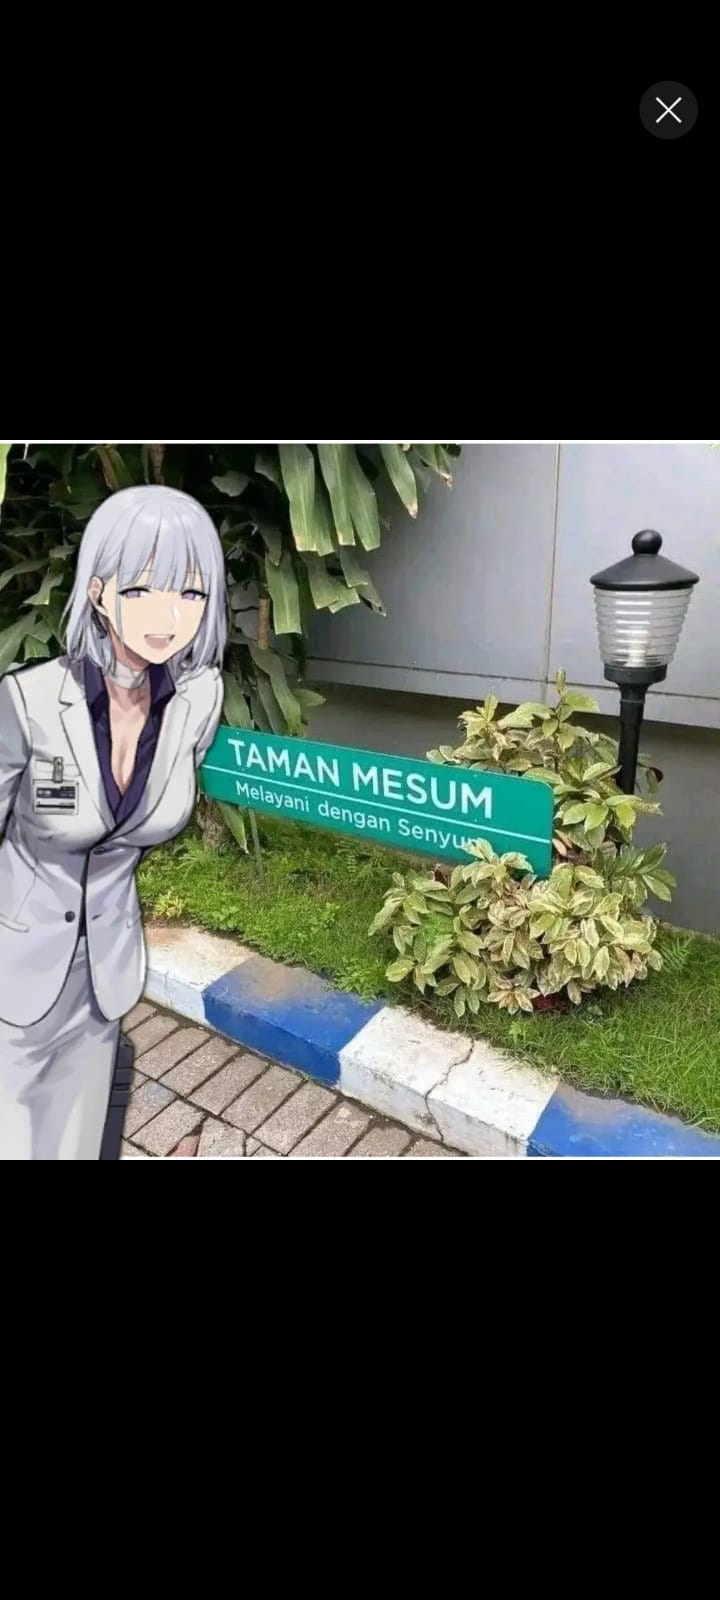

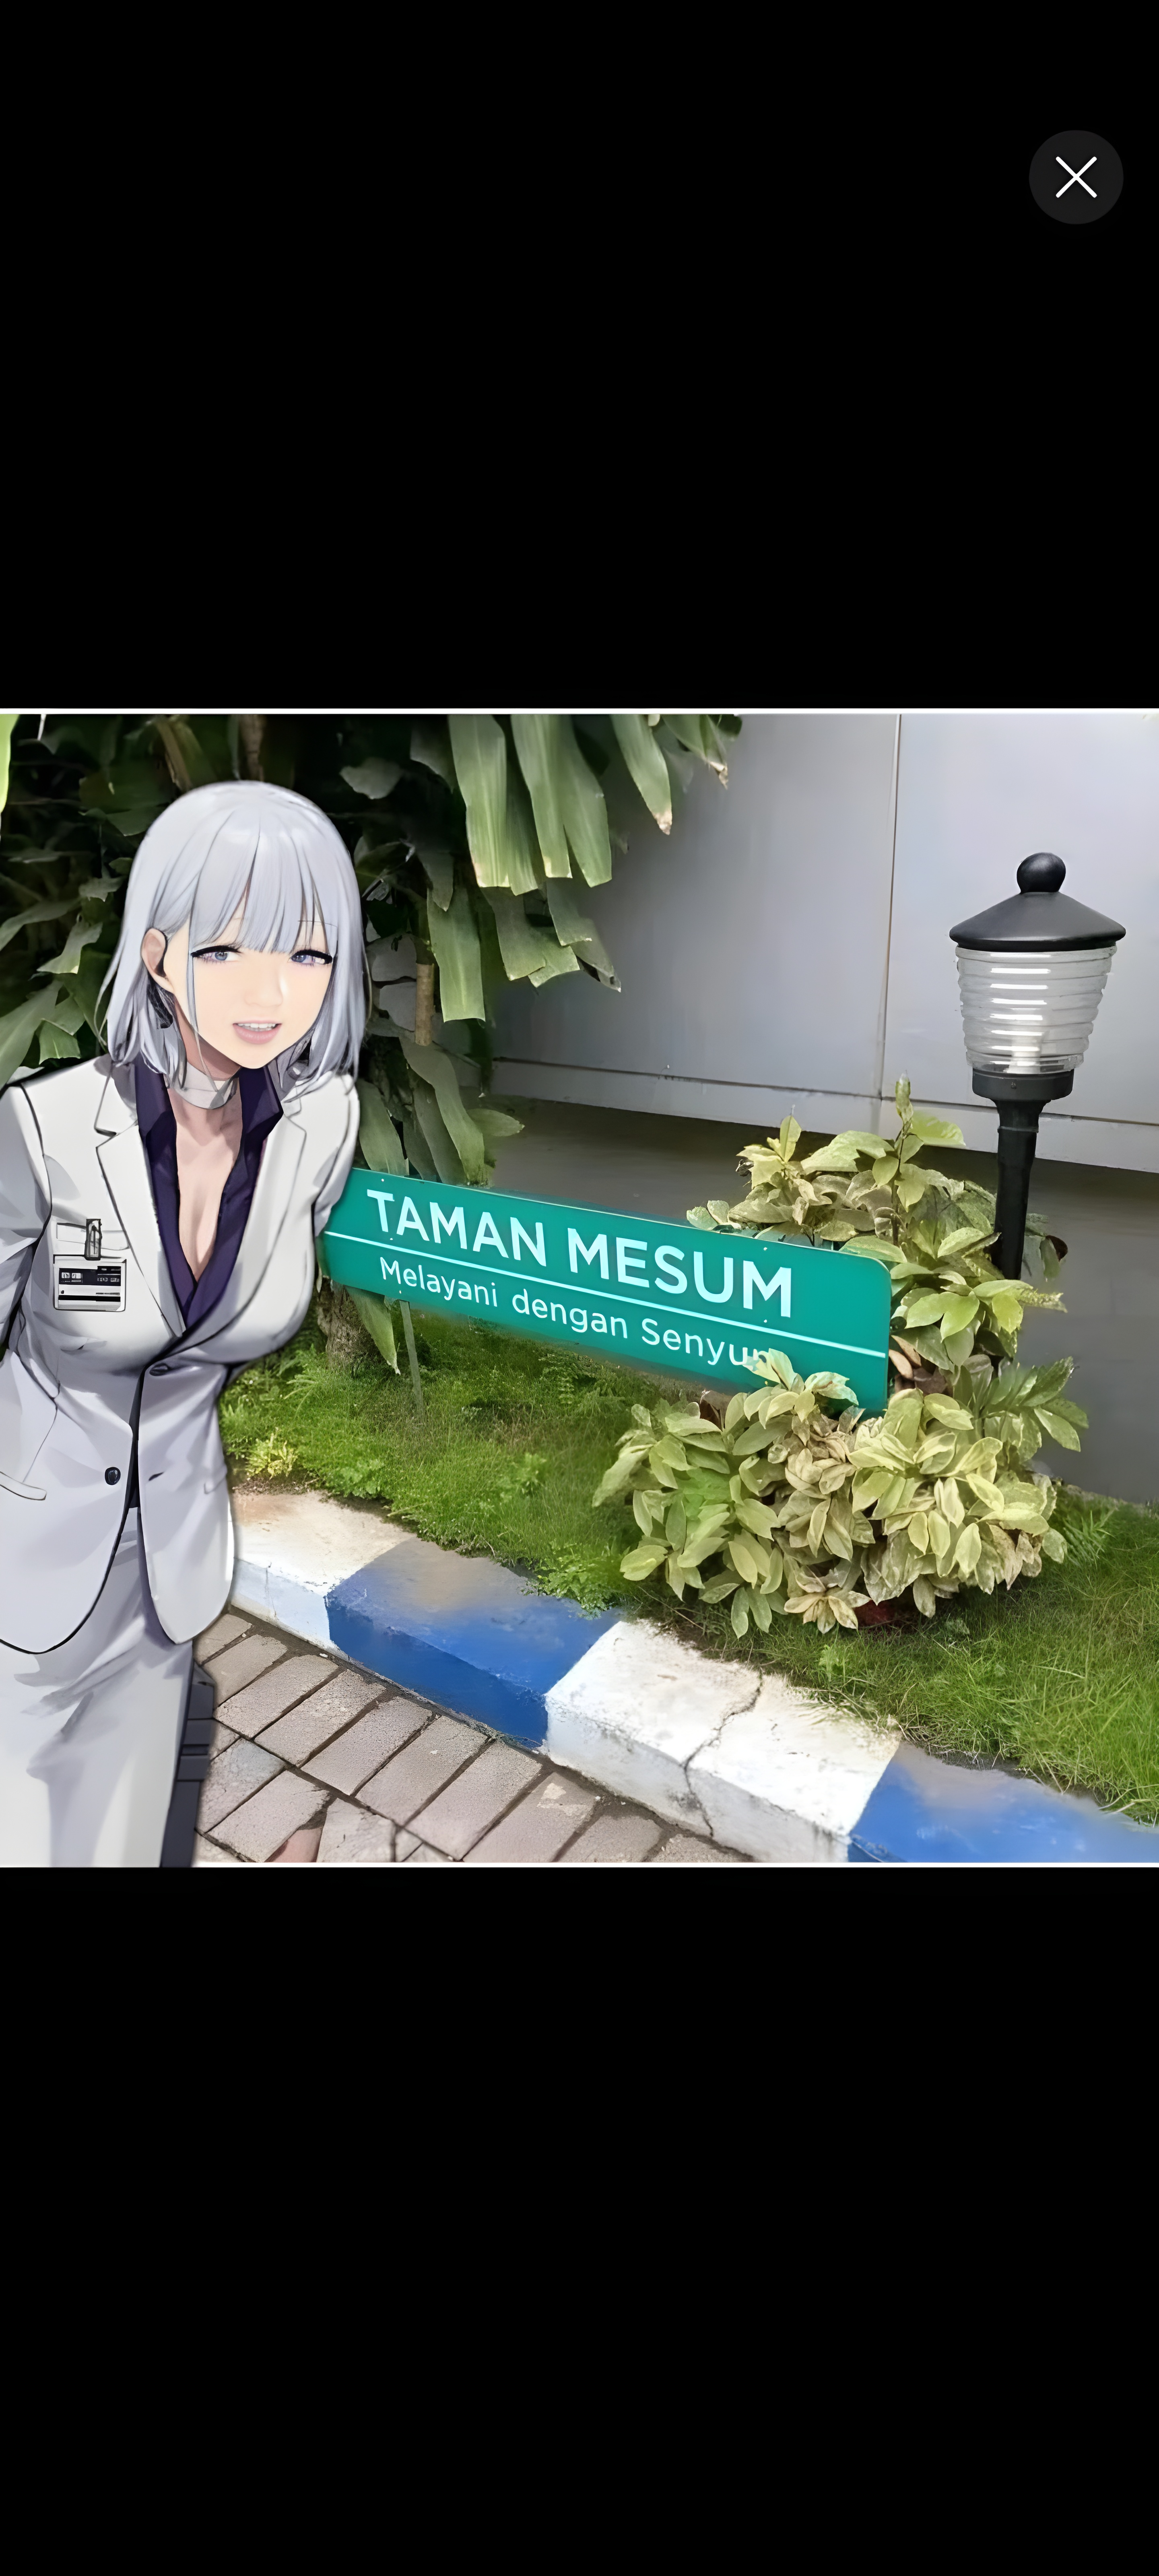

In [6]:
from IPython.display import Image, display
import os

# Ensure the result variable is not overwritten by the command output
if face_enhance == True:
  command = f"python '{code}' -i '{input}' -n '{model}' -o '{output}' -s '{scale}' --face_enhance"
elif face_enhance == False:
  command = f"python '{code}' -i '{input}' -n '{model}' -o '{output}' -s '{scale}'"

# Execute the command. Do not capture the output in a variable
# to avoid overwriting the 'result' variable which stores the output file path.
# The !{command} execution might still interfere with the 'result' variable
# in some environments.
!{command}

# -h                   show this help
# -i input-path        input image path (jpg/png/webp) or directory
# -o output-path       output image path (jpg/png/webp) or directory
# -s scale             upscale ratio (can be 2, 3, 4. default=4)
# -t tile-size         tile size (>=32/0=auto, default=0) can be 0,0,0 for multi-gpu
# -m model-path        folder path to the pre-trained models. default=models
# -n model-name        model name (default=realesr-animevideov3, can be realesr-animevideov3 | realesrgan-x4plus | realesrgan-x4plus-anime | realesrnet-x4plus)
# -g gpu-id            gpu device to use (default=auto) can be 0,1,2 for multi-gpu
# -j load:proc:save    thread count for load/proc/save (default=1:2:2) can be 1:2,2,2:2 for multi-gpu
# -x                   enable tta mode"
# -f format            output image format (jpg/png/webp, default=ext/png)
# -v                   verbose output

# Re-calculate the expected output path and assign it to 'result'
# to ensure it holds the correct string value after the shell command execution.
def generate_result_path(input_path):
    # Extract the directory and filename from the input path
    directory, filename = os.path.split(input_path)

    # Remove the extension from the filename
    filename_without_extension, extension = os.path.splitext(filename)

    # Create the output path by adding '_out' before the extension
    output_filename = filename_without_extension + "_out" + extension
    output_path = os.path.join(directory, output_filename)

    return output_path

result = generate_result_path(input)

# Now display the images
display(Image(filename=input, width=720))
display(Image(filename=result, width=720))